<a href="https://colab.research.google.com/github/jeslinpjames/ML_Algorithms_ParallelComputing/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images from 28x28 to 1D array of 784 pixels
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0  # Normalize
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0      # Normalize

# Split training data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

print(f"Train set shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Validation set shape: {x_val.shape}, Labels: {y_val.shape}")
print(f"Test set shape: {x_test.shape}, Labels: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train set shape: (54000, 784), Labels: (54000,)
Validation set shape: (6000, 784), Labels: (6000,)
Test set shape: (10000, 784), Labels: (10000,)


In [3]:
# Initialize logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Predict on validation and test sets
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9261
Precision: 0.9252
Recall: 0.9250
F1 Score: 0.9250

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.89      0.89       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



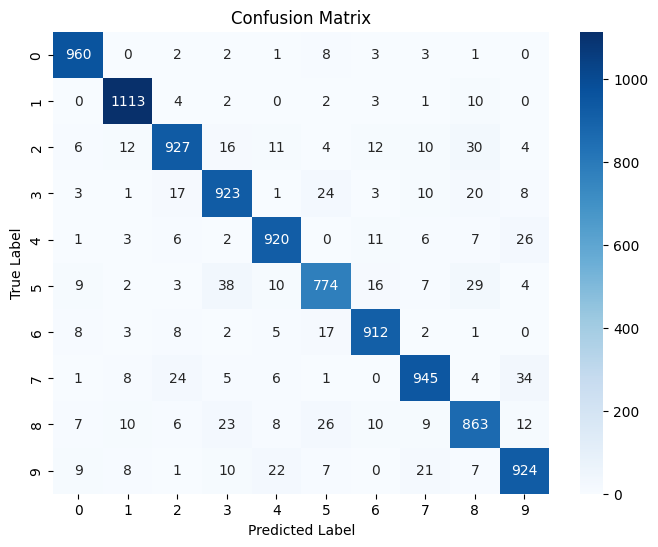

In [4]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Define parameter grid for grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'solver': ['saga', 'lbfgs']  # Choose solver
}

# Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42),
                           param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Train model with best parameters
best_model = grid_search.best_estimator_
y_test_best_pred = best_model.predict(x_test)

# Evaluate optimized model
accuracy_best = accuracy_score(y_test, y_test_best_pred)
precision_best = precision_score(y_test, y_test_best_pred, average='macro')
recall_best = recall_score(y_test, y_test_best_pred, average='macro')
f1_best = f1_score(y_test, y_test_best_pred, average='macro')

print(f"Optimized Model Accuracy: {accuracy_best:.4f}")
print(f"Optimized Model Precision: {precision_best:.4f}")
print(f"Optimized Model Recall: {recall_best:.4f}")
print(f"Optimized Model F1 Score: {f1_best:.4f}")

In [ ]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
x_train_2D = pca.fit_transform(x_train)
x_test_2D = pca.transform(x_test)

# Train logistic regression on reduced 2D features
model_2D = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, random_state=42)
model_2D.fit(x_train_2D, y_train)

# Plot decision boundary
h = 0.02  # Step size in mesh grid
x_min, x_max = x_train_2D[:, 0].min() - 1, x_train_2D[:, 0].max() + 1
y_min, y_max = x_train_2D[:, 1].min() - 1, x_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict for each point in mesh
Z = model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
scatter = plt.scatter(x_test_2D[:, 0], x_test_2D[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Paired)
plt.colorbar(scatter)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundary Visualization (2D PCA Projection)")
plt.show()